In [1]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA



In [ ]:
#PCA + Linear Regression

In [31]:
dataset = load_breast_cancer()
dataset.data.shape
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["label"] = dataset.target
df["label"] = df["label"].map({0: dataset.target_names[0], 1: dataset.target_names[1]})
df["label"].value_counts()



,count
label,
benign,357
malignant,212


In [35]:
pca = PCA(n_components=2)
pca_breast = pca.fit_transform(dataset.data)
df_pca = pd.DataFrame(pca_breast,
                      columns=["Component 1", "Component 2"])


In [29]:
print(df_pca.head())




   Component 1  Component 2  Component 3
0  1160.142574  -293.917544    48.578398
1  1269.122443    15.630182   -35.394534
2   995.793889    39.156743    -1.709753
3  -407.180803   -67.380320     8.672848
4   930.341180   189.340742     1.374801


In [39]:
fig = px.scatter(
    df_pca,
    x = "Component 1",
    y = "Component 2",
    title = "Breast Cancer"
)
fig.show()

In [49]:
#linear regression y = b1 * x + b0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("studentscores.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
regressor = LinearRegression()
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred







array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

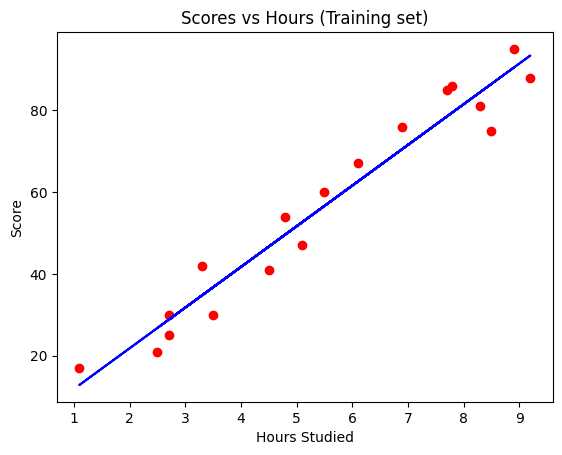

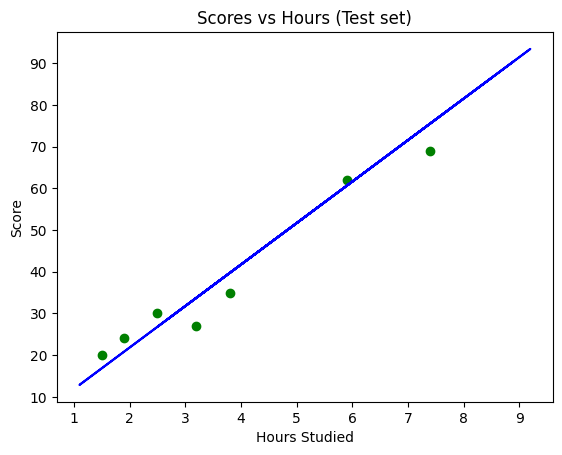

In [50]:
plt.scatter(X_train, y_train, color='red')  # რეალური ქულები (ტრენინგი)
plt.plot(X_train, regressor.predict(X_train), color='blue')  # პროგნოზირებული ხაზი
plt.title('Scores vs Hours (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

# სატესტო ნაკრებში მონაცემების ვიზუალიზაცია
plt.scatter(X_test, y_test, color='green')  # რეალური ქულები (ტესტი)
plt.plot(X_train, regressor.predict(X_train), color='blue')  # პროგნოზირებული ხაზი (ერთია ტრენინგისთვისაც და ტესტისთვისაც)
plt.title('Scores vs Hours (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [51]:
#Multiple Linear Regression

Single Linear Regression (მარტივი წრფივი რეგრესია):

წარმოიდგინეთ, რომ ცდილობთ გამოიცნოთ სახლის ფასი მხოლოდ მისი ფართობის მიხედვით.
აქ გვაქვს ერთი დამოუკიდებელი ცვლადი (X) - ფართობი, და ერთი დამოკიდებული ცვლადი (Y) - ფასი.
ფორმულა: Y = b0 + b1*X
სადაც b0 არის Y-ღერძთან გადაკვეთის წერტილი, ხოლო b1 არის დახრილობა.
გრაფიკულად, ეს გამოისახება როგორც ერთი წრფე 2D სიბრტყეზე.


Multiple Linear Regression (მრავლობითი წრფივი რეგრესია):

ახლა წარმოიდგინეთ, რომ სახლის ფასის გამოსაცნობად იყენებთ რამდენიმე ფაქტორს: ფართობს, ოთახების რაოდენობას, ასაკს, და ადგილმდებარეობას.
აქ გვაქვს რამდენიმე დამოუკიდებელი ცვლადი (X1, X2, X3, ...) და ერთი დამოკიდებული ცვლადი (Y).
ფორმულა: Y = b0 + b1X1 + b2X2 + b3*X3 + ...
სადაც b0 კვლავ არის Y-ღერძთან გადაკვეთის წერტილი, ხოლო b1, b2, b3 და ა.შ. არიან თითოეული ცვლადის კოეფიციენტები.
გრაფიკულად, ეს უკვე აღარ არის მარტივი წრფე, არამედ მრავალგანზომილებიანი სიბრტყე.



ძირითადი განსხვავებები:

ცვლადების რაოდენობა:

Single: ერთი დამოუკიდებელი ცვლადი.
Multiple: ორი ან მეტი დამოუკიდებელი ცვლადი.


კომპლექსურობა:

Single: უფრო მარტივი, ადვილი ვიზუალიზაციისთვის.
Multiple: უფრო რთული, მაგრამ ხშირად უფრო ზუსტი რეალურ სიტუაციებში.


გამოყენება:

Single: გამოიყენება, როცა გვაინტერესებს ერთი ფაქტორის გავლენა.
Multiple: გამოიყენება, როცა ბევრი ფაქტორი მოქმედებს შედეგზე.


ინტერპრეტაცია:

Single: ადვილი ინტერპრეტაციისთვის. ერთი კოეფიციენტი გვიჩვენებს X-ის გავლენას Y-ზე.
Multiple: უფრო რთული ინტერპრეტაციისთვის. თითოეული კოეფიციენტი გვიჩვენებს შესაბამისი X-ის გავლენას Y-ზე, სხვა ფაქტორების უცვლელობის პირობებში.



ორივე მეთოდი მნიშვნელოვანია და გამოიყენება სხვადასხვა სიტუაციაში, დამოკიდებული იმაზე, თუ რამდენი ფაქტორის გათვალისწინება გვჭირდება ჩვენი პროგნოზის გასაკეთებლად.

In [70]:
dataset = pd.read_csv('50_Startups.csv')

In [71]:
unique_states = dataset['State'].unique()
unique_states

array(['New York', 'California', 'Florida'], dtype=object)

In [72]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [73]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer




In [74]:
# Label Encoding: სვეტი 'State' (მესამე სვეტი, ინდექსი 3) რიცხვებად გადაყვანა
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# OneHotEncoding: კატეგორიული მონაცემების ბინარულ ვექტორებად ტრანსფორმაცია (სვეტი 3)
ct = ColumnTransformer([("encoder", OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)


X


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [75]:
#Avoiding Trap of dummy var
X = X[: , 1:]

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)



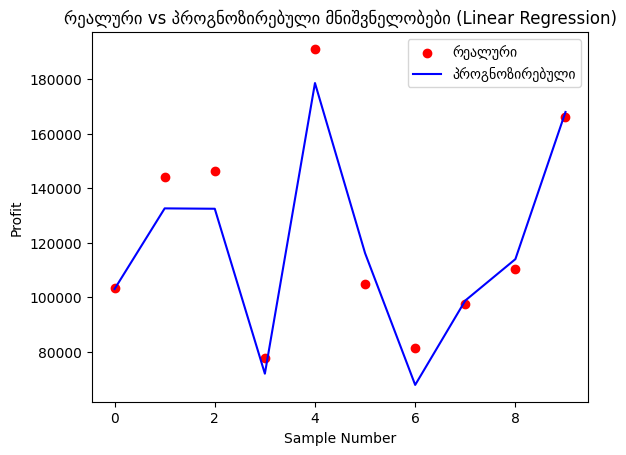

In [77]:
plt.scatter(np.arange(len(y_test)), y_test, color='red', label="რეალური")
plt.plot(np.arange(len(y_pred)), y_pred, color='blue', label="პროგნოზირებული")

# გრაფიკის დეტალები
plt.title("რეალური vs პროგნოზირებული მნიშვნელობები (Linear Regression)")
plt.xlabel("Sample Number")
plt.ylabel("Profit")
plt.legend()
plt.show()